In [1]:
#equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 21 March 2018.
#compare simulated fixed point to that predicted by BGT, for various ring masses

In [2]:
#restore output
parent_folders = ['ring_mass_1.5e-10/', 'ring_mass_5.0e-10/', 'ring_mass_1.5e-9/', 
    'ring_mass_5.0e-9/', 'ring_mass_1.5e-8/', 'ring_mass_5.0e-8/']
total_ring_masses = []
da_list = []
de_list = []
dwt_list = []
a_avg_list = []
e_avg_list = []
de_eq_bgt_list = []
de_eq_list = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    print 'total_ring_mass = ', total_ring_mass
    total_ring_masses += [total_ring_mass]
    #calculate differences da, de, dwt between outer & inner streamline's periapse
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    da_list += [da.mean()]
    de_list += [de.mean()]
    dwt_list += [dwt.mean()]
    a_avg_list += [a_mean.mean()]
    e_avg_list += [e_mean.mean()]
    #equilibrium de
    de_eq = np.median(de)
    de_eq_list += [de_eq]
    #lowest-order q and H(q2)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    H_avg = np.median(H)
    q_avg = np.median(q)
    print 'H_avg = ', H_avg
    print 'q_avg = ', q_avg
    #BGT's equilibrium de
    M_central = 1.0
    Ra = (Rp/a_mean).mean()
    da_over_a = (da/a_mean).mean()
    de_eq_bgt = (21.0/4)*np.pi*e_mean.mean()*J2*(M_central/total_ring_mass)*(Ra**2)*(da_over_a**3)/H_avg
    de_eq_bgt_list += [de_eq_bgt]
    print 'equilibrium de_eq = ', de_eq
    print 'equilibrium de_eq_bgt = ', de_eq_bgt
ring_masses = np.array(total_ring_masses)
de_eq = np.array(de_eq_list)
de_eq_bgt = np.array(de_eq_bgt_list)
a = np.array(a_avg_list)
da = np.array(da_list)
a = np.array(a_avg_list)
dw = np.array(dwt_list)
adeda_eq = a*de_eq/da
adeda_eq_bgt = a*de_eq_bgt/da

reading output in folder =  ring_mass_1.5e-10/output
r.shape =  (1001, 2, 241)
total_ring_mass =  1.5e-10
H_avg =  1.5825204022747552
q_avg =  0.8984396063758922
equilibrium de_eq =  0.0008930725718766424
equilibrium de_eq_bgt =  0.0008667550429074609
reading output in folder =  ring_mass_5.0e-10/output
r.shape =  (1001, 2, 241)
total_ring_mass =  5e-10
H_avg =  0.6753913271066773
q_avg =  0.5787127007137746
equilibrium de_eq =  0.000573543673090383
equilibrium de_eq_bgt =  0.0006093862277133989
reading output in folder =  ring_mass_1.5e-9/output
r.shape =  (1001, 2, 241)
total_ring_mass =  1.5e-09
H_avg =  0.5197637535655364
q_avg =  0.22468071752946728
equilibrium de_eq =  0.00021967943794445367
equilibrium de_eq_bgt =  0.0002641693018785858
reading output in folder =  ring_mass_5.0e-9/output
r.shape =  (5001, 2, 241)
total_ring_mass =  5e-09
H_avg =  0.5006648414666355
q_avg =  0.04207487261625262
equilibrium de_eq =  3.711513382566138e-05
equilibrium de_eq_bgt =  8.254688458543896e

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

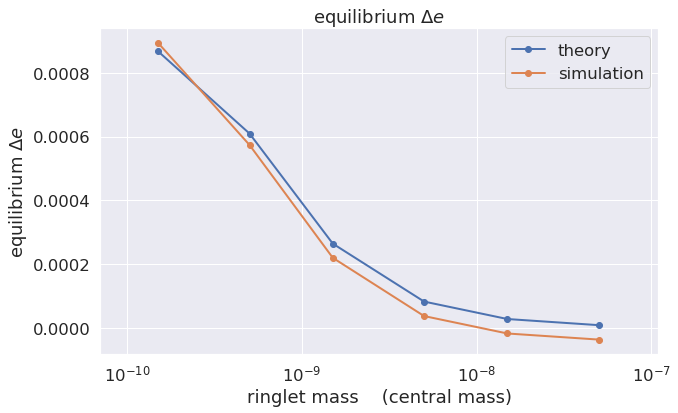

In [4]:
#plot de_eq vs total_ring_masses
x = ring_masses
y = de_eq_bgt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='theory')
y = de_eq
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='simulation')
p = ax.set_title(r'equilibrium $\Delta e$')
p = ax.set_xlabel('ringlet mass    (central mass)')
p = ax.set_ylabel(r'equilibrium $\Delta e$')
p = ax.set_xlim(7.0e-11, 1.1e-7)
p = ax.set_xscale('log')
#p = ax.set_yscale('log')
p = plt.legend()

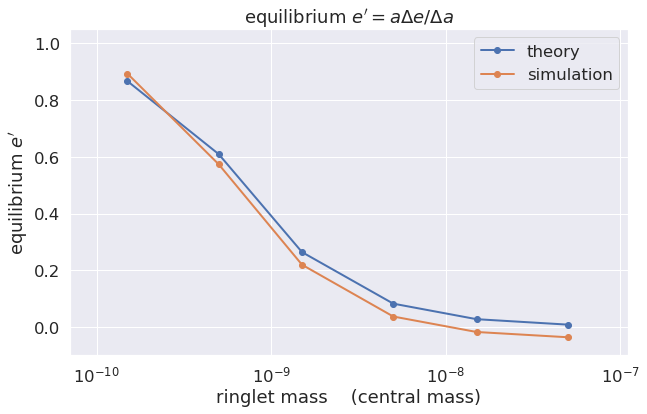

In [5]:
#plot adeda_eq vs total_ring_masses
x = ring_masses
y = adeda_eq_bgt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='theory')
y = adeda_eq
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='simulation')
p = ax.set_title(r"equilibrium $e'=a\Delta e/\Delta a$")
p = ax.set_xlabel('ringlet mass    (central mass)')
p = ax.set_ylabel(r"equilibrium $e'$")
p = ax.set_xlim(7.0e-11, 1.1e-7)
p = ax.set_ylim(-0.1, 1.05)
p = ax.set_xscale('log')
#p = ax.set_yscale('log')
p = plt.legend()